In [41]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, StackingRegressor
from xgboost import XGBRegressor

In [42]:
train_df = pd.read_csv(r"C:\ds\train.csv")
test_df = pd.read_csv(r"C:\ds\test.csv")



In [58]:
train_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'index'],
      dtype='object')

In [59]:
test_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'index'],
      dtype='object')

In [60]:
test_df['quality'] = np.nan

In [44]:
train_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,index
0,6.9,0.28,0.41,1.4,0.016,6.0,55.0,0.98876,3.16,0.40,13.4,0,1
1,6.9,0.16,0.30,9.6,0.057,50.0,185.0,0.99780,3.39,0.38,9.6,1,2
2,6.2,0.23,0.36,17.2,0.039,37.0,130.0,0.99946,3.23,0.43,8.8,1,3
3,7.1,0.43,0.30,6.6,0.025,15.0,138.0,0.99126,3.18,0.46,12.6,1,4
4,6.2,0.39,0.24,4.8,0.037,45.0,138.0,0.99174,3.23,0.43,11.2,1,5


In [54]:
test_df = test_df.drop('quality', axis=1)

In [53]:
test_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,index,quality
0,8.8,0.350,0.49,1.0,0.036,14.0,56.0,0.99200,2.96,0.33,10.5,1279,NaN
1,7.8,0.645,0.00,2.0,0.082,8.0,16.0,0.99640,3.38,0.59,9.8,1280,NaN
2,8.9,0.300,0.35,4.6,0.032,32.0,148.0,0.99458,3.15,0.45,11.5,1281,NaN
3,7.4,0.410,0.24,1.8,0.066,18.0,47.0,0.99560,3.37,0.62,10.4,1282,NaN
4,7.4,0.390,0.23,7.0,0.033,29.0,126.0,0.99400,3.14,0.42,10.5,1283,NaN


In [45]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,2979.0,7.185935,1.257025,3.80000,6.400000,6.900,7.60000,15.60000
volatile acidity,2979.0,0.340438,0.164859,0.09000,0.230000,0.290,0.40000,1.58000
citric acid,2979.0,0.318896,0.145116,0.00000,0.240000,0.310,0.40000,1.23000
residual sugar,2979.0,5.598724,4.744350,0.60000,1.800000,3.400,8.30000,22.60000
chlorides,2979.0,0.056233,0.034583,0.00900,0.039000,0.048,0.06300,0.61000
free sulfur dioxide,2979.0,31.119168,18.448613,2.00000,17.000000,29.000,42.00000,289.00000
total sulfur dioxide,2979.0,119.701074,56.038939,6.00000,84.000000,122.000,159.00000,440.00000
density,2979.0,0.994776,0.002899,0.98711,0.992495,0.995,0.99692,1.00369
pH,2979.0,3.212726,0.158821,2.74000,3.110000,3.200,3.31000,3.90000
sulphates,2979.0,0.527090,0.147908,0.23000,0.430000,0.500,0.60000,2.00000


In [61]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Define the features to include (dropping 'quality' and 'index')
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
            'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
            'pH', 'sulphates', 'alcohol']

# Preprocessing for numerical data (imputation + scaling)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # or 'median' depending on your data
    ('scaler', StandardScaler())
])

# Combine transformations into a ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, features)
])

# Split train_df into X (features) and y (target)
X = train_df[features]
y = train_df['quality']

# Split the data for validation (or you can use cross-validation)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)


In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

# Example Models

# Logistic Regression
logreg_pipeline = make_pipeline(preprocessor, LogisticRegression())
logreg_scores = cross_val_score(logreg_pipeline, X_train, y_train, cv=5)

# Random Forest
rf_pipeline = make_pipeline(preprocessor, RandomForestClassifier())
rf_scores = cross_val_score(rf_pipeline, X_train, y_train, cv=5)

# Support Vector Machine (SVM)
svc_pipeline = make_pipeline(preprocessor, SVC())
svc_scores = cross_val_score(svc_pipeline, X_train, y_train, cv=5)

# Print cross-validation scores for comparison
print("Logistic Regression Scores:", logreg_scores)
print("Random Forest Scores:", rf_scores)
print("SVC Scores:", svc_scores)


Logistic Regression Scores: [0.72327044 0.69811321 0.73794549 0.71848739 0.73739496]
Random Forest Scores: [0.75052411 0.76100629 0.78616352 0.79201681 0.79411765]
SVC Scores: [0.7442348  0.72955975 0.75681342 0.7289916  0.75840336]


In [68]:
# Import necessary libraries
from scipy import stats
import numpy as np

# List of features (excluding 'quality' and 'index')
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
            'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
            'pH', 'sulphates', 'alcohol']

# Calculate Z-scores for all features
z_scores = np.abs(stats.zscore(train_df[features]))

# Identify outliers (where any Z-score > 3)
outliers = (z_scores > 3).any(axis=1)  # Returns a boolean mask

# Remove the outliers
train_df_cleaned = train_df[~outliers]

# Check the size of the cleaned data
print(f"Original dataset size: {train_df.shape}")
print(f"Cleaned dataset size: {train_df_cleaned.shape}")


Original dataset size: (2979, 13)
Cleaned dataset size: (2748, 13)


In [69]:
train_df_cleaned.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,index
0,6.9,0.28,0.41,1.4,0.016,6.0,55.0,0.98876,3.16,0.40,13.4,0,1
1,6.9,0.16,0.30,9.6,0.057,50.0,185.0,0.99780,3.39,0.38,9.6,1,2
2,6.2,0.23,0.36,17.2,0.039,37.0,130.0,0.99946,3.23,0.43,8.8,1,3
3,7.1,0.43,0.30,6.6,0.025,15.0,138.0,0.99126,3.18,0.46,12.6,1,4
4,6.2,0.39,0.24,4.8,0.037,45.0,138.0,0.99174,3.23,0.43,11.2,1,5


In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# List of features (excluding 'quality' and 'index')
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
            'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
            'pH', 'sulphates', 'alcohol']

# 1. Prepare the Data
# Features (X) and target (y) for training
X_train = train_df_cleaned[features]
y_train = train_df_cleaned['quality']

# Prepare the test data (without the 'quality' column)
X_test = test_df[features]

# 2. Train the Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# 3. Predict the "quality" on test_df
y_test_pred = rf_model.predict(X_test)

# Add the predicted "quality" to the test_df
test_df['quality'] = y_test_pred

# Print the predicted quality values
print(test_df[['index', 'quality']])


      index  quality
0      1279        0
1      1280        0
2      1281        1
3      1282        1
4      1283        0
...     ...      ...
1273   2552        0
1274   2553        1
1275   2554        0
1276   2555        1
1277   2556        1

[1278 rows x 2 columns]


In [71]:
# Save only the 'index' and 'quality' columns to submission.csv
submission = test_df[['index', 'quality']]
submission.to_csv('submission.csv', index=False)

print("submission.csv file has been created.")


submission.csv file has been created.


In [72]:
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split

# Split train_df_cleaned into features and target variable
X = train_df_cleaned[features]
y = train_df_cleaned['quality']

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Model on the training set
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the validation set
y_valid_pred = rf_model.predict(X_valid)

# Calculate precision
precision = precision_score(y_valid, y_valid_pred, pos_label=1)  # pos_label=1 for good wine

print(f"Precision of the model: {precision:.4f}")


Precision of the model: 0.8060


In [73]:
# Make sure to create the submission DataFrame with the correct column names
submission = test_df[['index', 'quality']]

# Check the columns of the submission DataFrame
print(submission.head())  # To verify the first few rows and the column names

# Save the DataFrame to CSV
submission.to_csv('submission2.csv', index=False)

print("submission.csv file has been created.")


   index  quality
0   1279        0
1   1280        0
2   1281        1
3   1282        1
4   1283        0
submission.csv file has been created.


Selected Features:  ['volatile acidity', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'alcohol']
Feature Importance:
                Feature  Importance
4               alcohol    0.242718
3               density    0.227791
0      volatile acidity    0.182615
2  total sulfur dioxide    0.177688
1   free sulfur dioxide    0.169187


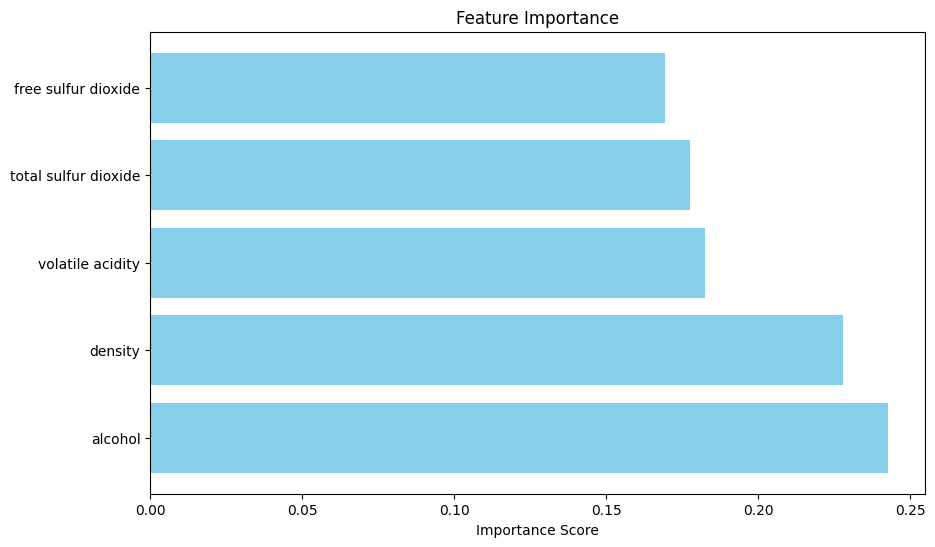

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
import pandas as pd

# Define features excluding 'quality'
features = ['volatile acidity', 'citric acid', 'residual sugar',
            'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 
            'density', 'pH', 'sulphates', 'alcohol']

# Prepare the dataset
X = train_df_cleaned[features]
y = train_df_cleaned['quality']

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# 1. Fit RFE
rfe = RFE(estimator=rf_model, n_features_to_select=5)  # Choose the number of features you want
rfe.fit(X, y)

# Get the selected features
selected_features = X.columns[rfe.support_]
print("Selected Features: ", selected_features.tolist())

# 2. Train the Random Forest model with selected features
rf_model.fit(X[selected_features], y)

# 3. Calculate variable importance
importance = rf_model.feature_importances_
importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display feature importance
print("Feature Importance:")
print(importance_df)

# Optionally: Plot the feature importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance')
plt.show()


In [79]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score

# 1. Prepare the data with selected features
X_selected = train_df_cleaned[selected_features]
y = train_df_cleaned['quality']

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# 2. Train the Random Forest Model on the selected features
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# 3. Evaluate the model on the validation set
y_valid_pred = rf_model.predict(X_valid)

# Calculate precision
precision = precision_score(y_valid, y_valid_pred, pos_label=1)  # pos_label=1 for good wine
print(f"Precision of the model using selected features: {precision:.4f}")

# 4. Make predictions on the test set
X_test_selected = test_df[selected_features]
y_test_pred = rf_model.predict(X_test_selected)

# Add the predicted "quality" to the test_df
test_df['quality'] = y_test_pred

# Save the submission file
submission = test_df[['index', 'quality']]
submission.to_csv('submission.csv', index=False)

print("submission.csv file has been created after using selected features.")


Precision of the model using selected features: 0.7770
submission.csv file has been created after using selected features.


In [80]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=5, scoring='precision', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", grid_search.best_params_)

# Use the best estimator to make predictions
best_rf_model = grid_search.best_estimator_
y_valid_pred = best_rf_model.predict(X_valid)

# Calculate precision for the best model
precision = precision_score(y_valid, y_valid_pred, pos_label=1)
print(f"Precision of the best model after tuning: {precision:.4f}")


C:\Users\pedro\AppData\Roaming\Python\Python312\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters found:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Precision of the best model after tuning: 0.7789


In [81]:
import xgboost as xgb
from sklearn.metrics import precision_score

# Prepare the dataset
X_selected = train_df_cleaned[selected_features]
y = train_df_cleaned['quality']

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Initialize and fit the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions on the validation set
y_valid_pred = xgb_model.predict(X_valid)

# Calculate precision
precision = precision_score(y_valid, y_valid_pred, pos_label=1)
print(f"Precision of the XGBoost model: {precision:.4f}")


Precision of the XGBoost model: 0.7597


C:\Users\pedro\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [15:15:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [82]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                            cv=3, scoring='precision', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters found for XGBoost: ", grid_search.best_params_)


Best parameters found for XGBoost:  {'colsample_bytree': 1.0, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}


C:\Users\pedro\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [15:15:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [83]:
test_df["quality"].value_counts()

quality
1    672
0    606
Name: count, dtype: int64